In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load datasets
user_df = pd.read_excel("Tourism dataset\\User.xlsx")
city_df = pd.read_excel("Tourism dataset\\City.xlsx")
continent_df = pd.read_excel("Tourism dataset\\Continent.xlsx")
country_df = pd.read_excel("Tourism dataset\\Country.xlsx")
item_df = pd.read_excel("Tourism dataset\\Item.xlsx")
mode_df = pd.read_excel("Tourism dataset\\Mode.xlsx")
region_df = pd.read_excel("Tourism dataset\\Region.xlsx")
transaction_df = pd.read_excel("Tourism dataset\\Transaction.xlsx")
type_df = pd.read_excel("Tourism dataset\\Type.xlsx")

In [3]:
# EDA
citydetail_df = pd.merge(user_df, city_df, on='CityId', how='inner')
citydetail_df.drop("CountryId_y", axis=1, inplace=True)
citydetail_df.rename(columns={'CountryId_x': 'CountryId'}, inplace=True)
countrydetail_df = pd.merge(citydetail_df, country_df, on='CountryId', how='inner')
countrydetail_df.drop("RegionId_y", axis=1, inplace=True)
countrydetail_df.rename(columns={'RegionId_x': 'RegionId'}, inplace=True)
countrydetail_df = pd.merge(countrydetail_df, region_df, on='RegionId', how='inner')
#countrydetail_df
countrydetail_df.drop("ContinentId_y", axis=1, inplace=True)
countrydetail_df.rename(columns={'ContinentId_x': 'ContinentId'}, inplace=True)
continent_df.rename(columns={'ContenentId': 'ContinentId'}, inplace=True)
userdetails_df = pd.merge(countrydetail_df, continent_df, on='ContinentId', how='inner')
transactiondetails_df = pd.merge(transaction_df, item_df, on='AttractionId', how='inner')
transactiondetails_df.rename(columns={'VisitMode': 'VisitModeId'}, inplace=True)
transactiondetails_df = pd.merge(transactiondetails_df, mode_df, on='VisitModeId', how='inner')
transactiondetails_df = pd.merge(transactiondetails_df, type_df, on='AttractionTypeId', how='inner')

In [ ]:
user_recom = transactiondetails_df
user_recom = user_recom.sample(min(20000, len(transactiondetails_df))) 



user_item_matrix = user_recom.pivot_table('Rating', ['UserId'], 'AttractionId')
user_item_matrix.fillna(0, inplace=True)
user_item_matrix_sparse = csr_matrix(user_item_matrix) # Convert to sparse matrix
user_mat_sim = cosine_similarity(user_item_matrix_sparse) #calculate cosine similarity from the sparse matrix.

In [5]:
user_recom


,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,VisitMode,AttractionType
52685,210869,62352,2017,2,4,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Friends,Historic Sites
47136,200140,64065,2017,6,2,1166,3,3,34,Malioboro Road,Yogyakarta,Couples,Flea & Street Markets
10312,14861,13995,2015,5,2,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Couples,Nature & Wildlife Areas
23549,37195,17122,2017,3,4,481,4,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia",Friends,Beaches
15461,23455,50799,2019,4,2,841,3,1,92,Waterbom Bali,"Jl. Kartika Plaza, Kuta 80361 Indonesia",Couples,Water Parks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,5217,36326,2018,1,3,640,4,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Family,Nature & Wildlife Areas
52476,210596,41466,2013,4,2,1297,3,3,44,Yogyakarta Palace,Yogyakarta,Couples,Historic Sites
20615,32831,43654,2017,9,2,673,5,1,13,Seminyak Beach,Seminyak,Couples,Beaches
11479,16264,41589,2014,1,2,640,2,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Couples,Nature & Wildlife Areas


In [6]:
user_item_matrix
user_mat_sim

array([[1. , 0. , 1. , ..., 0. , 0.8, 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 1. ],
       [1. , 0. , 1. , ..., 0. , 0.8, 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0.8, 0. , 0.8, ..., 0. , 1. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 1. ]])

In [7]:
df = pd.merge(userdetails_df, transactiondetails_df, on='UserId', how='inner')
df = df.sample(30000)

In [8]:
df

,UserId,ContinentId,RegionId,CountryId,CityId,CityName,Country,Region,Continent,TransactionId,...,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,VisitMode,AttractionType
23905,41510,4,15,109,4861.0,Northcote,Australia,Australia,Australia & Oceania,21370,...,5,3,841,5,1,92,Waterbom Bali,"Jl. Kartika Plaza, Kuta 80361 Indonesia",Family,Water Parks
27697,47485,2,8,51,1525.0,Naples,United States,Northern America,America,44166,...,10,2,650,3,1,13,Sanur Beach,Sanur,Couples,Beaches
513,907,3,14,106,3551.0,Singapore,Singapore,South East Asia,Asia,9403,...,11,5,640,4,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Solo,Nature & Wildlife Areas
33862,57439,3,14,98,2981.0,Bandar Seri Begawan,Brunei Darussalam,South East Asia,Asia,105649,...,12,4,737,5,1,76,Tanah Lot Temple,"Kecamatan Kediri, Kabupaten Tabanan, Beraban 8...",Friends,Religious Sites
47930,79709,5,18,138,693.0,Atlanta,Georgia,Eastern Europe,Europe,203795,...,10,4,1171,5,3,91,Merapi Volcano,Yogyakarta,Friends,Volcanos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9455,16963,4,15,109,780.0,Brighton,Australia,Australia,Australia & Oceania,23991,...,1,3,841,4,1,92,Waterbom Bali,"Jl. Kartika Plaza, Kuta 80361 Indonesia",Family,Water Parks
2702,4996,4,15,109,3937.0,Buderim,Australia,Australia,Australia & Oceania,7677,...,11,2,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Couples,Nature & Wildlife Areas
10196,18307,3,14,101,3013.0,Bali,Indonesia,South East Asia,Asia,36006,...,5,3,481,5,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia",Family,Beaches
32916,55936,3,14,106,3551.0,Singapore,Singapore,South East Asia,Asia,68407,...,7,3,748,4,1,72,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Family,Points of Interest & Landmarks


In [9]:
df.drop("ContinentId", axis=1, inplace=True)
df.drop("RegionId", axis=1, inplace=True)
df.drop("CountryId", axis=1, inplace=True)
df.drop("CityId", axis=1, inplace=True)
df.drop("Country", axis=1, inplace=True)
df.drop("Region", axis=1, inplace=True)
df.drop("Continent", axis=1, inplace=True)
df.drop("TransactionId", axis=1, inplace=True)
df.drop("VisitYear", axis=1, inplace=True)
df.drop("VisitMonth", axis=1, inplace=True)
df.drop("VisitModeId", axis=1, inplace=True)
df.drop("AttractionId", axis=1, inplace=True)
df.drop("AttractionAddress", axis=1, inplace=True)
df.drop("AttractionCityId", axis=1, inplace=True)
df.drop("AttractionTypeId", axis=1, inplace=True)


In [10]:
df

,UserId,CityName,Rating,Attraction,VisitMode,AttractionType
23905,41510,Northcote,5,Waterbom Bali,Family,Water Parks
27697,47485,Naples,3,Sanur Beach,Couples,Beaches
513,907,Singapore,4,Sacred Monkey Forest Sanctuary,Solo,Nature & Wildlife Areas
33862,57439,Bandar Seri Begawan,5,Tanah Lot Temple,Friends,Religious Sites
47930,79709,Atlanta,5,Merapi Volcano,Friends,Volcanos
...,...,...,...,...,...,...
9455,16963,Brighton,4,Waterbom Bali,Family,Water Parks
2702,4996,Buderim,5,Sacred Monkey Forest Sanctuary,Couples,Nature & Wildlife Areas
10196,18307,Bali,5,Nusa Dua Beach,Family,Beaches
32916,55936,Singapore,4,Tegalalang Rice Terrace,Family,Points of Interest & Landmarks


In [11]:
col = ['UserId', 'CityName', 'Attraction', 'VisitMode', 'AttractionType', 'Rating']
df = df[col]

col1 = ['CityName', 'Rating', 'Attraction', 'VisitMode']
data = df[col1]

In [12]:
df

,UserId,CityName,Attraction,VisitMode,AttractionType,Rating
23905,41510,Northcote,Waterbom Bali,Family,Water Parks,5
27697,47485,Naples,Sanur Beach,Couples,Beaches,3
513,907,Singapore,Sacred Monkey Forest Sanctuary,Solo,Nature & Wildlife Areas,4
33862,57439,Bandar Seri Begawan,Tanah Lot Temple,Friends,Religious Sites,5
47930,79709,Atlanta,Merapi Volcano,Friends,Volcanos,5
...,...,...,...,...,...,...
9455,16963,Brighton,Waterbom Bali,Family,Water Parks,4
2702,4996,Buderim,Sacred Monkey Forest Sanctuary,Couples,Nature & Wildlife Areas,5
10196,18307,Bali,Nusa Dua Beach,Family,Beaches,5
32916,55936,Singapore,Tegalalang Rice Terrace,Family,Points of Interest & Landmarks,4


In [13]:
data

,CityName,Rating,Attraction,VisitMode
23905,Northcote,5,Waterbom Bali,Family
27697,Naples,3,Sanur Beach,Couples
513,Singapore,4,Sacred Monkey Forest Sanctuary,Solo
33862,Bandar Seri Begawan,5,Tanah Lot Temple,Friends
47930,Atlanta,5,Merapi Volcano,Friends
...,...,...,...,...
9455,Brighton,4,Waterbom Bali,Family
2702,Buderim,5,Sacred Monkey Forest Sanctuary,Couples
10196,Bali,5,Nusa Dua Beach,Family
32916,Singapore,4,Tegalalang Rice Terrace,Family


In [14]:
# # Feature Engineering and Label Encoding
# features = ['UserId', 'CityName', 'Attraction', 'VisitMode', 'AttractionType']
# RegClassfeatures = ['CityName', 'Rating', 'Attraction']

# label_encoder = {}
# for i in features:
#     if df[i].dtype == 'object':
#         label_encoder[i] = LabelEncoder()
#         df[i] = label_encoder[i].fit_transform(df[i])

# rclabel_encoder = {}
# for i in RegClassfeatures:
#     if data[i].dtype == 'object':
#         rclabel_encoder[i] = LabelEncoder()
#         data[i] = rclabel_encoder[i].fit_transform(data[i])



# features = ['UserId', 'CityName', 'Attraction', 'VisitMode', 'AttractionType']
# RegClassfeatures = ['CityName', 'Rating', 'Attraction']

# # Label Encoding for Regression Data (df)
# label_encoder = {}
# for i in features:
#     if 'object' in str(df[i].dtype):
#         label_encoder[i] = LabelEncoder()
#         df[i] = label_encoder[i].fit_transform(df[i])

# # Label Encoding for Classification Data (data)
# rclabel_encoder = {}
# for i in RegClassfeatures:
#     if 'object' in str(data[i].dtype):
#         rclabel_encoder[i] = LabelEncoder()
#         data[i] = rclabel_encoder[i].fit_transform(data[i])

features = ['UserId', 'CityName', 'Attraction', 'VisitMode', 'AttractionType']
RegClassfeatures = ['CityName', 'Rating', 'Attraction']

label_encoder = {}
for i in features:
    if 'object' in str(df[i].dtype):  # Improved dtype check
        label_encoder[i] = LabelEncoder()
        df.loc[:, i] = label_encoder[i].fit_transform(df[i]) # use .loc

rclabel_encoder = {}
for i in RegClassfeatures:
    if 'object' in str(data[i].dtype): # Improved dtype check
        rclabel_encoder[i] = LabelEncoder()
        data.loc[:, i] = rclabel_encoder[i].fit_transform(data[i]) # use .loc


In [15]:
# # Model Training (Random Forest Regressor)
# X_reg = df[features]
# y_reg = df['Rating']
# model = RandomForestRegressor(random_state=42)
# model.fit(X_reg, y_reg)

# Model Training (Random Forest Regressor)
X_reg = df[features]
y_reg = df['Rating']
model = RandomForestRegressor(random_state=42)
model.fit(X_reg, y_reg)

RandomForestRegressor(random_state=42)

In [16]:
# # Model Training (Random Forest Classifier)
# X_class = data[RegClassfeatures[:-1]] #remove VisitMode
# y_class = data['VisitMode']
# rc = RandomForestClassifier(random_state=42)
# rc.fit(X_class, y_class)

# Model Training (Random Forest Classifier)
X_class = data[RegClassfeatures] # Include Attraction
y_class = data['VisitMode']
rc = RandomForestClassifier(random_state=42)
rc.fit(X_class, y_class)

RandomForestClassifier(random_state=42)

In [17]:
# Save Models and Encoders
pickle.dump(model, open('rf_regressor.pkl', 'wb'))
pickle.dump(rc, open('recomClassifier.pkl', 'wb'))
pickle.dump(label_encoder, open('label_encoder.pkl', 'wb'))
pickle.dump(rclabel_encoder, open('rclabel_encoder.pkl', 'wb'))

# Save additional pkl files
pickle.dump(user_mat_sim, open('user_mat_sim.pkl', 'wb'))
pickle.dump(user_item_matrix, open('user_item_matrix.pkl', 'wb'))
pickle.dump(user_recom, open('user_recom.pkl', 'wb'))
pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(mode_df, open('mode_df.pkl', 'wb'))
pickle.dump(type_df, open('type_df.pkl', 'wb'))

print("Models, encoders, and additional data saved successfully!")

Models, encoders, and additional data saved successfully!


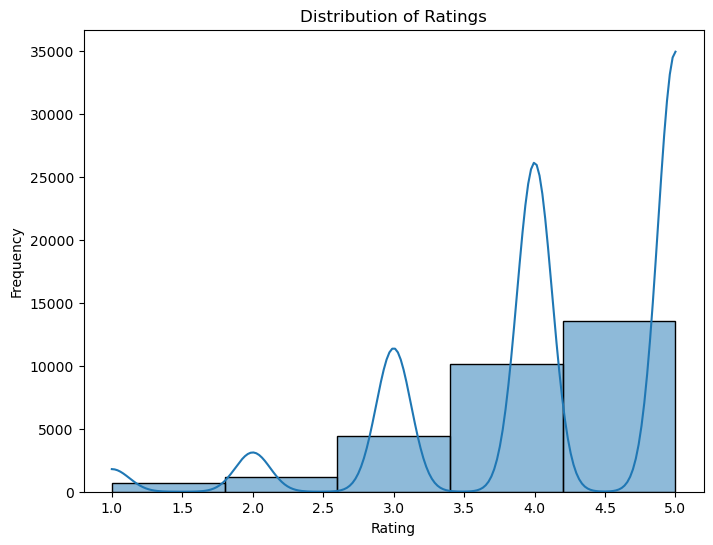

In [18]:
# Graphical Representations
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


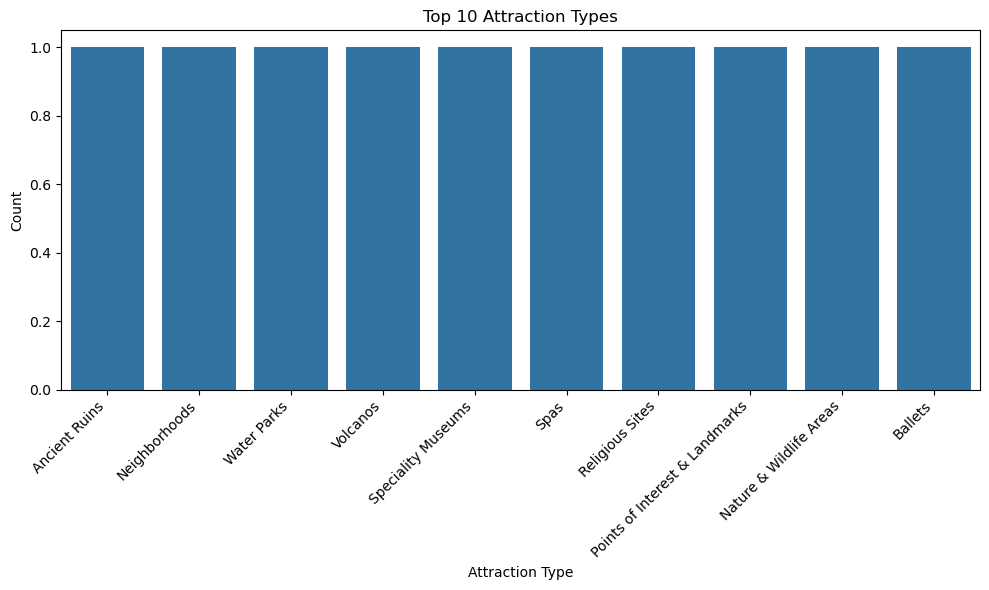

In [19]:
# 2. Top 10 Attraction Types
plt.figure(figsize=(10, 6))
top_attraction_types = type_df['AttractionType'].value_counts().head(10)
sns.barplot(x=top_attraction_types.index, y=top_attraction_types.values)
plt.title('Top 10 Attraction Types')
plt.xlabel('Attraction Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

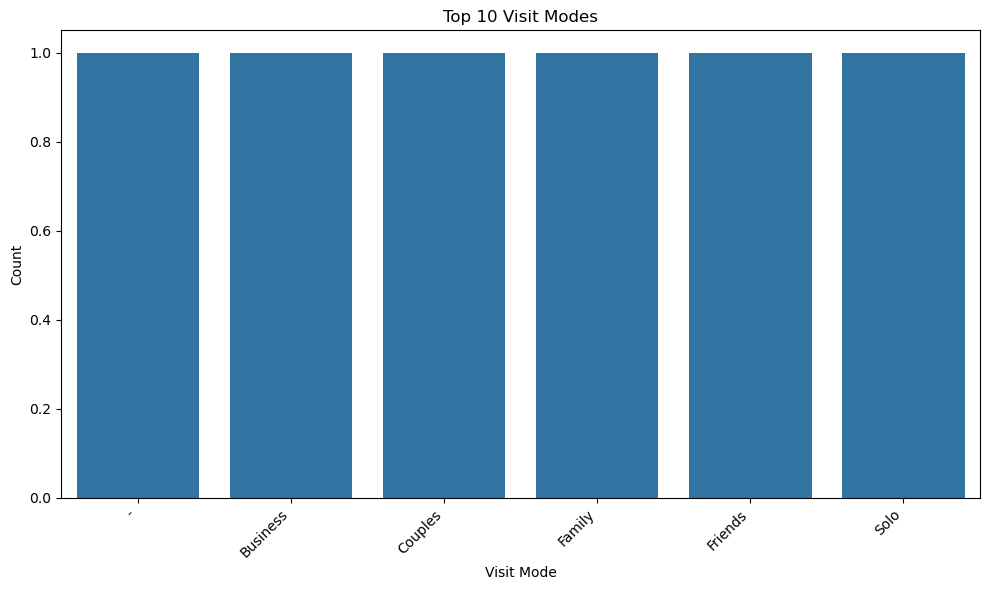

In [20]:
# 3. Top 10 Visit Modes
plt.figure(figsize=(10, 6))
top_visit_modes = mode_df['VisitMode'].value_counts().head(10)
sns.barplot(x=top_visit_modes.index, y=top_visit_modes.values)
plt.title('Top 10 Visit Modes')
plt.xlabel('Visit Mode')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

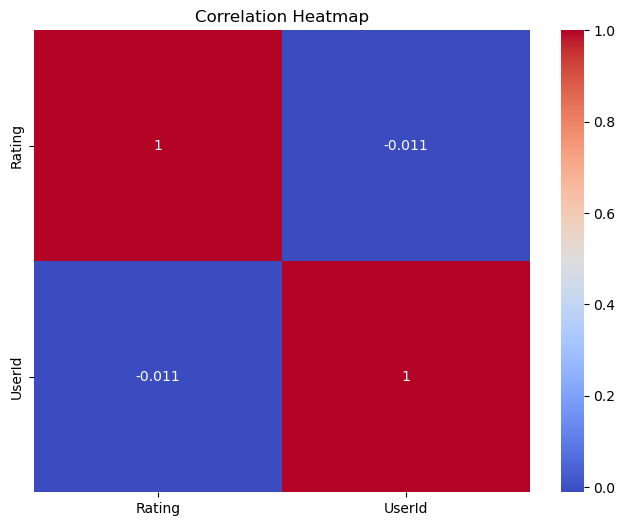

In [21]:
# 4. Correlation Heatmap (for numerical features, if any)
if 'Rating' in df.columns and 'UserId' in df.columns:
    corr_matrix = df[['Rating', 'UserId']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

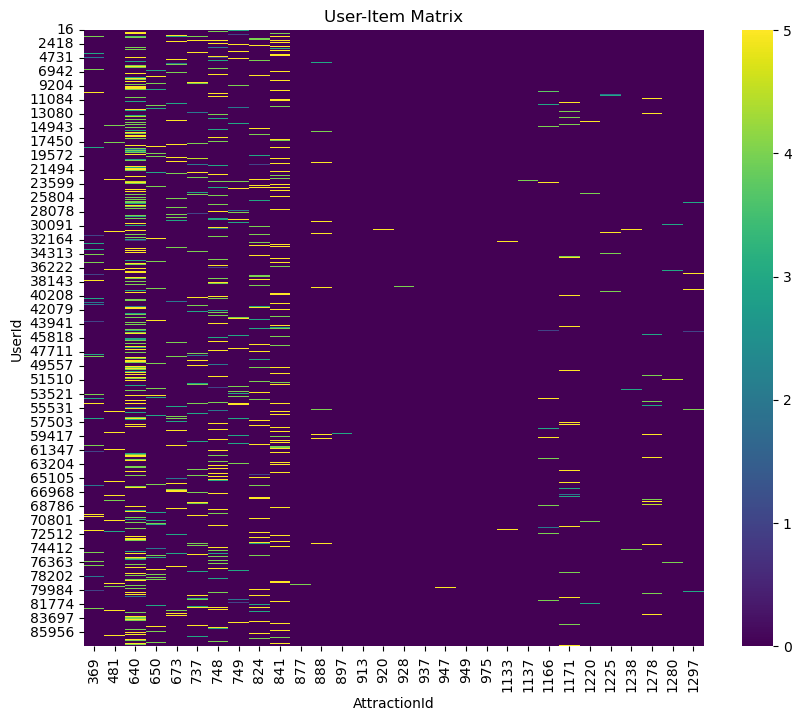

In [22]:
# 5. User Item Matrix Visualization (if small enough to visualize)
plt.figure(figsize=(10, 8))
sns.heatmap(user_item_matrix, cmap='viridis', cbar=True)
plt.title('User-Item Matrix')
plt.xlabel('AttractionId')
plt.ylabel('UserId')
plt.show()

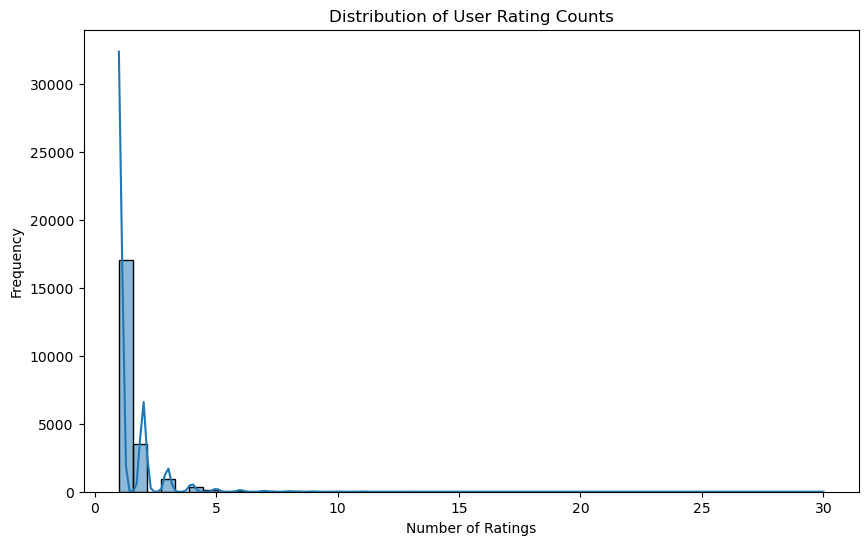

In [23]:
# 6. Distribution of User Ratings
plt.figure(figsize=(10, 6))
user_rating_counts = df['UserId'].value_counts()
sns.histplot(user_rating_counts, bins=50, kde=True)
plt.title('Distribution of User Rating Counts')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

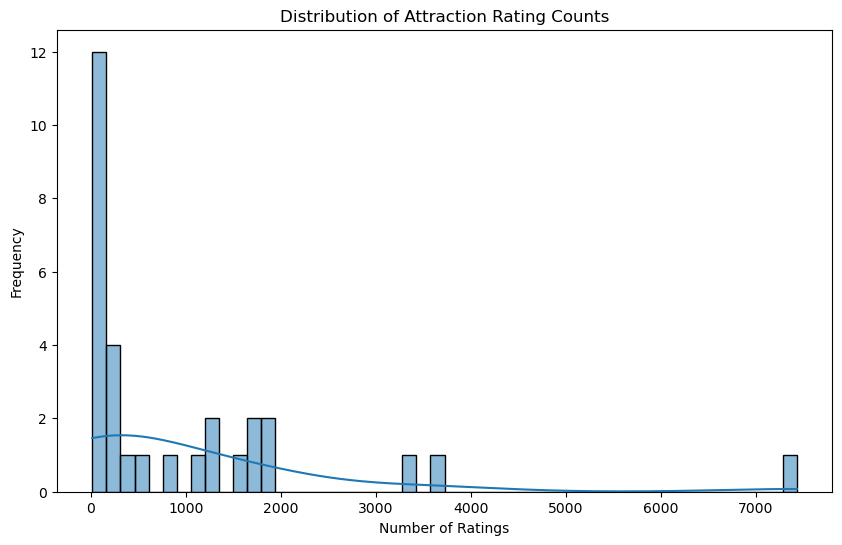

In [24]:
# 7. Distribution of Attraction Ratings
plt.figure(figsize=(10, 6))
attraction_rating_counts = df['Attraction'].value_counts()
sns.histplot(attraction_rating_counts, bins=50, kde=True)
plt.title('Distribution of Attraction Rating Counts')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

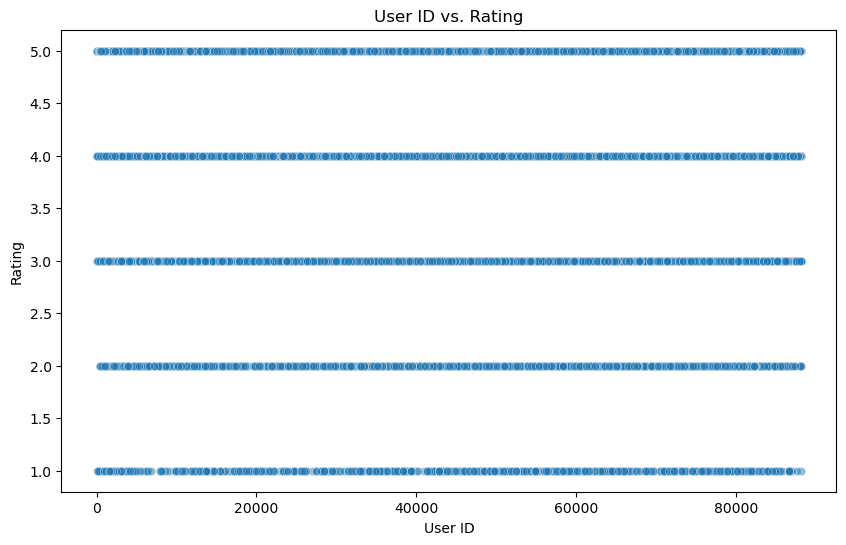

In [25]:
# 8. Scatter Plot of User ID vs. Rating (if meaningful)
if 'UserId' in df.columns and 'Rating' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='UserId', y='Rating', data=df, alpha=0.5)
    plt.title('User ID vs. Rating')
    plt.xlabel('User ID')
    plt.ylabel('Rating')
    plt.show()

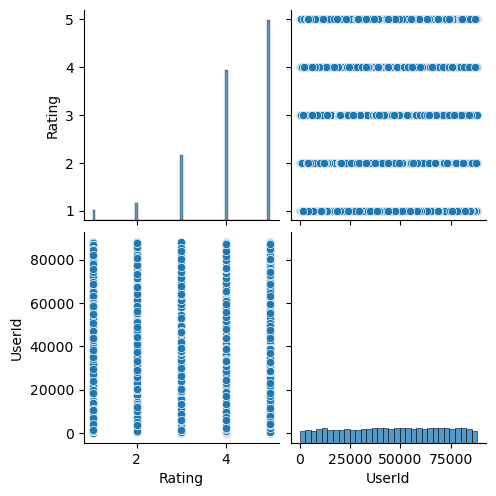

In [26]:
# 9. pairplot for numerical features if any.
if 'Rating' in df.columns and 'UserId' in df.columns:
    sns.pairplot(df[['Rating', 'UserId']])
    plt.show()

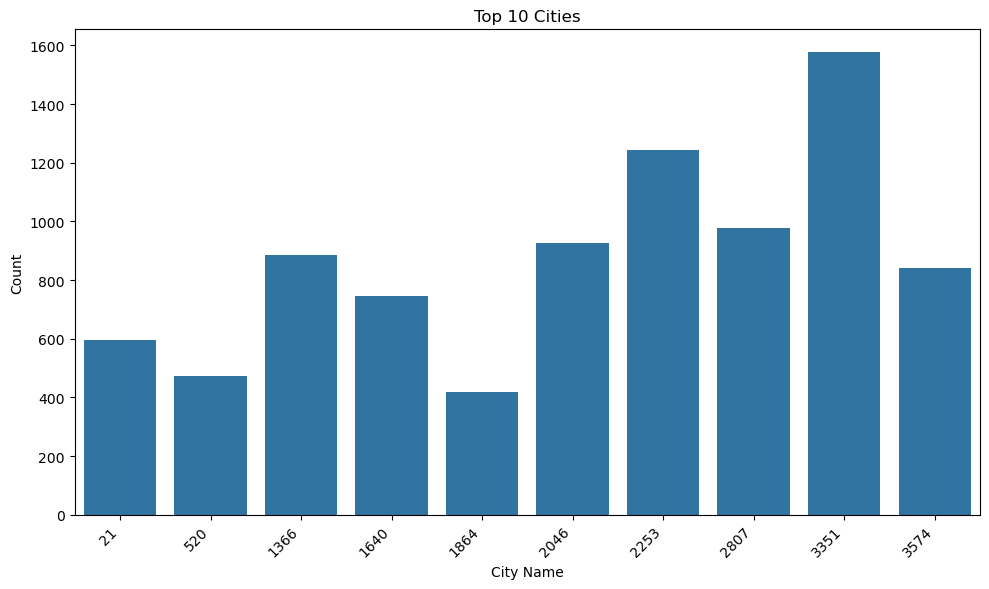

In [27]:
# 10. Bar Plot of top cities.
plt.figure(figsize=(10, 6))
top_cities = df['CityName'].value_counts().head(10)
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Cities')
plt.xlabel('City Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()